In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def detect_changes(image1, image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    diff = cv2.absdiff(gray1, gray2)

    blur = cv2.GaussianBlur(diff, (5, 5), 0)
    dog = cv2.Laplacian(blur, cv2.CV_64F)

    mean, std_dev = cv2.meanStdDev(dog)

    threshold = mean + 2 * std_dev

    mask = np.uint8(dog > threshold)

    final_image = cv2.bitwise_and(gray1, mask)

    return final_image

In [3]:
image1 = cv2.imread('../Images/curr_img.png')
image2 = cv2.imread('../Images/prev_img.png')

In [4]:
final_image = detect_changes(image1, image2)

Text(0.5, 1.0, 'Edge Map')

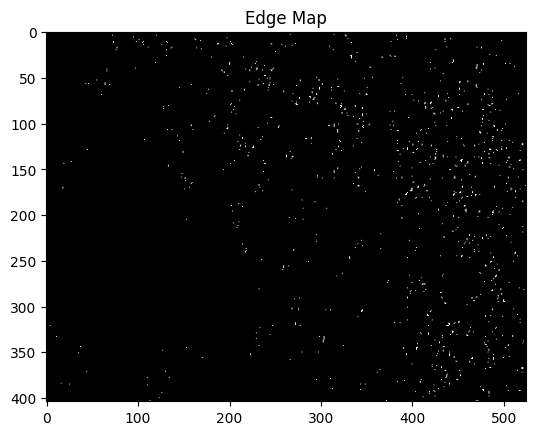

In [5]:
plt.imshow(final_image, cmap='gray')
plt.title('Edge Map')

In [6]:
plt.imsave('../Images/class_change.png', final_image, cmap='gray')

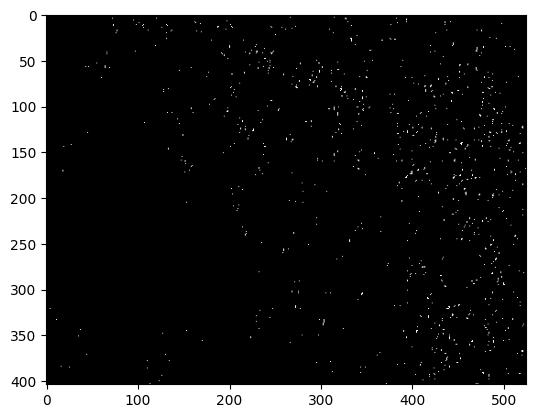

In [7]:
import imageio.v2 as imageio
image_new = imageio.imread('../Images/class_change.png')
plt.imshow(image_new)